In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

C:\Users\Admin\anaconda3\envs\aitd\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [6]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    print(y_pred)
    
    

[ 0.          0.94716287  0.89482681  0.79297863  0.79056462  0.8543175
  1.01445817  0.89188788  0.81437679  0.67048439  0.67362813  0.60803863
  0.71095684  0.68938634  0.68414062  0.60296573  0.57668332  0.53942335
  0.45030281  0.33352816  0.4073507   0.38366701  0.3472345   0.31485858
  0.32376713  0.27412181  0.26361298  0.39262695  0.39125011  0.33745501
  0.30582203  0.461104    0.59537749  0.57677865  0.60680149  0.53213953
  0.59426807  0.43473897  0.41884161  0.46546034  0.41680362  0.2957308
  0.36705295  0.31041076  0.48092996  0.52880621  0.54807426  0.38470802
  0.29931052  0.20164084  0.18756595  0.08087899  0.06045862  0.05471901
 -0.00542739  0.19073834  0.19050478  0.11046335 -0.00527194  0.10137384
  0.11987666  0.08106717  0.35264713  0.32688079  0.31382268  0.3584688
  0.30792322  0.34487531  0.36984875  0.39196309  0.4229763   0.34459565
  0.38472321  0.36423018  0.37444956  0.3984513   0.44623065  0.40273236
  0.44857347  0.56478385  0.61037671  0.54762648  0.63

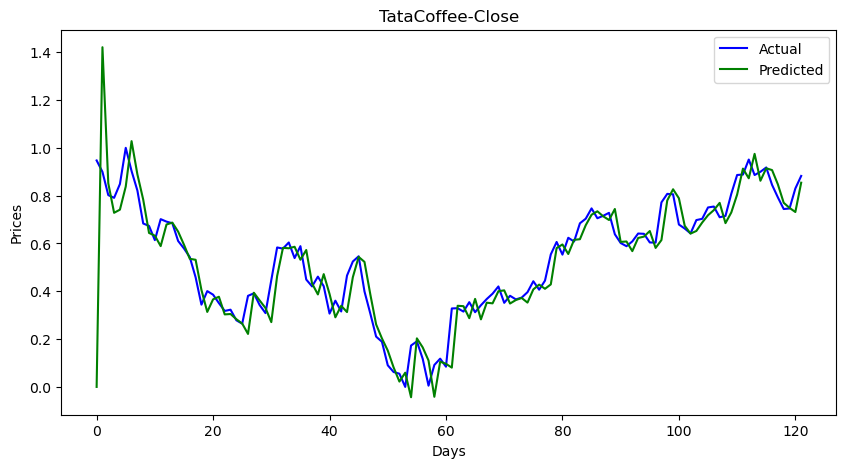

In [7]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [8]:
len(data1)

122

In [9]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [10]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

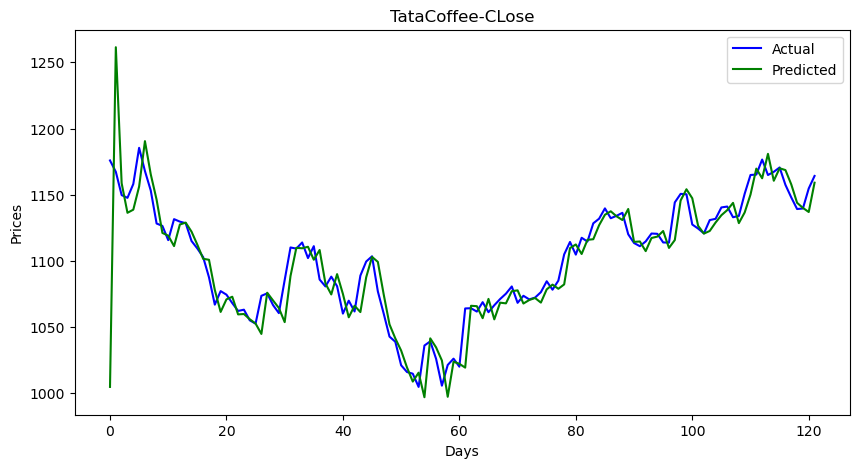

In [11]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [12]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [13]:
forecast

array([0.87673707, 0.88817013, 0.87649328, 0.88700071])

In [14]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [15]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [16]:
forecast_stock_price_test_oriF

,Closefore
0,1163.173063
1,1165.237498
2,1163.129043
3,1165.026339
